# **Tidying**

Part of the data engineering process is data cleaning and tidying. What is done in those two processes, is trying to make the data more readable, and complete. This makes much easier to analyze, visualize, and train the data.


## **Data Tidying**

Making the data more organized, and readable is the result of applying data tidying. Tidying transforms messy, inconsistent input into clean, well-structured tables.
   - Easier analysis and plotting
   - Simpler joins and mergers
   - More reproducible pipelines

In this section two main pandas functions are used in data tidying those are `melt` and `pivot_table`.

Let's start by taking a look at the below dataframe, which represents the income ranges based on religion. This is part of the PEW research, which is famous in the US for conducting pollings and surveys on citizens.

When the following are satisfied:


1. Each variable forms a column
2. Each observation forms a row
3. Each type of observational unit forms a table

We can then say that our dataset is *tidy*.

First we need to import pandas to read csv datasets.

In [249]:
import pandas as pd
import numpy as np


### **PEW Research Dataset**

1. Start by Importing the dataset into a pandas dataframe.

2. Observe the dataset using the `loc`, `iloc`, `head`, or `tail` approaches

***What does not seem right in the above dataframe?***

3. Try to make the column headers represent a variable not a value. For that, use the `melt` function.

### **Billboard Dataset**

This dataset outlines data about the top hit songs on the Billboard list and the week from entrance that it was in the billboard with the ranking.

1. Read the dataset and store it in a pandas dataframe. Note that the usual utf-8 encoding does not work on this dataset. The reason behind this is that there might be characters that are not supported by `utf-8`.

The suggestion is to use for this dataset `unicode_escape` encoding. (converts all non-ASCII characters into their \uXXXX representations)

2. Observe the first few rows of the dataset.

***What is wrong with the above dataset?***

3. Let's, again, use the `melt` function to fix the general structure of the dataframe.

If we inspect the current dataframe. We find that it is structured in a better way than before. 

However, the ***Week*** column looks a bit ugly!

4. Let's try to place only the week number in that column without the extras surronding it.

5. Now let's inspect the ***Week*** column in the dataframe.

Next, let's try to find the date at which the song ranked the number that is shown per row.

6. To do that let's first think of the equation that is going to get us the relevant date at which the song ranked the *rth*.



*Timedeltas are absolute differences in times, expressed in difference units (e.g. days, hours, minutes, seconds). This method converts an argument from a recognized timedelta format / value into a Timedelta type.*


***What is the problem with the calculation above?***

7. Let's only keep necessary columns

8. How to rename your columns?

Display the dataframe

In the above dataframe, there are some *NaN* values. What are we going to do? <br/>
9. Apply quick data cleaning and then observe the dataset

## **Data Cleaning**

Data cleaning involves removing unwanted characters, imputing, or dropping missing values.

The decision is based on the dataset you have, and the information you can extract from the other columns.


Examples of data cleaning include cleaning:

1.   **Missing Data**
2.   **Irregular Data** (Outliers)
3.   **Unnecessary Data** — Repetitive Data, Duplicates and more
4.   **Inconsistent Data** — Capitalization, Addresses and more








### **Cars Data Set**

Start by reading the dataset related to car models: ./CSVs/cars.csv

In [250]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

cars = pd.read_csv("./data/cars.csv", sep=";")
#I used sep=; so it can tell pandas what character to separates the columns in the csv otherwise it gave errors and unamed values alot

#.head previews first 5 row
cars.head() #inspect raw data to see anomalies'


,Car,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model,Origin
0,STRING,DOUBLE,INT,DOUBLE,DOUBLE,DOUBLE,DOUBLE,INT,CAT
1,Chevrolet Chevelle Malibu,NaN,8,307.0,130.0,3504.,12.0,70,US
2,Buick Skylark 320,15.0,8,350.0,NaN,3693.,11.5,70,US
3,Plymouth Satellite,NaN,8,318.0,150.0,3436.,11.0,70,US
4,AMC Rebel SST,16.0,8,NaN,150.0,NaN,12.0,70,US


First Row seems to be the datatype, we need to remove it

In [251]:
cars = cars.drop(0) # droop the first row (datatype)
cars.head()

,Car,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model,Origin
1,Chevrolet Chevelle Malibu,NaN,8,307.0,130.0,3504.,12.0,70,US
2,Buick Skylark 320,15.0,8,350.0,NaN,3693.,11.5,70,US
3,Plymouth Satellite,NaN,8,318.0,150.0,3436.,11.0,70,US
4,AMC Rebel SST,16.0,8,NaN,150.0,NaN,12.0,70,US
5,Ford Torino,17.0,8,302.0,140.0,3449.,10.5,70,US


Let's observe the columns with null values.  Either by using the `isnull().sum()` function

In [252]:

cars.isnull().sum()
#observes the columns with null values

Car             0
MPG             3
Cylinders       0
Displacement    1
Horsepower      2
Weight          1
Acceleration    0
Model           0
Origin          0
dtype: int64

There aren't many missing values. Let's take a glimpse at the percentage of the missing values:

**HINT:** We'll need `Numpy` for the below task.

In [253]:
missing_percent = (cars.isnull().sum()/len(cars)) * 100
print(missing_percent)
# calculates the percentage of missing per column
#Multiply by 100 to get the percentage value


total_missing = cars.isnull().sum().sum() #total missing cells
total_cells = cars.shape[0] * cars.shape[1] # total cells in data set
overall_missing_percent = (total_missing/ total_cells) * 100

print(f"\nOverall missing percentage in dataset: {overall_missing_percent:.2f}%")



Car             0.000000
MPG             0.738916
Cylinders       0.000000
Displacement    0.246305
Horsepower      0.492611
Weight          0.246305
Acceleration    0.000000
Model           0.000000
Origin          0.000000
dtype: float64

Overall missing percentage in dataset: 0.19%


Around *0.19%* of the values are missing, which isn't a lot. Therefore, we might go with the option of dropping all the rows with null values.

In [254]:
cars_dropna = cars.dropna()
cars_dropna.shape
#ensures dataset is complete for modeling
#drops row containig NaN and prints new shape

(401, 9)

Lets also check dropping the columns

In [255]:
cars_dropcol = cars.dropna(axis=1)
cars_dropcol.shape

(406, 5)

Let's observe how many columns we lost

In [256]:
print("Original Shape:", cars.shape)
print("After dropping rows:", cars_dropna.shape)
print("After dropping columns:", cars_dropcol.shape)

Original Shape: (406, 9)
After dropping rows: (401, 9)
After dropping columns: (406, 5)


### **Cars Dataset - Filling in missing values automatically**

Another option is to try and fill in the missing values through imputations.

Let's take the `MPG` column for example. We can fill in the missing values with 0s through the following line of code:

`df_cars.fillna(0) `. 

However, this does not make much sense as there isn't MPG equal to 0. How about we plot the MPG column and if it follows a random distribution we can use the mean of the column to compute the missing values. Otherwise, we can use the median (if there is a skewed normal distribution). However, there might be a better way of imputation which is getting the median or the mean of the MPG of the cars with similar attributes.

Data types after conversion:
, cars.dtypes


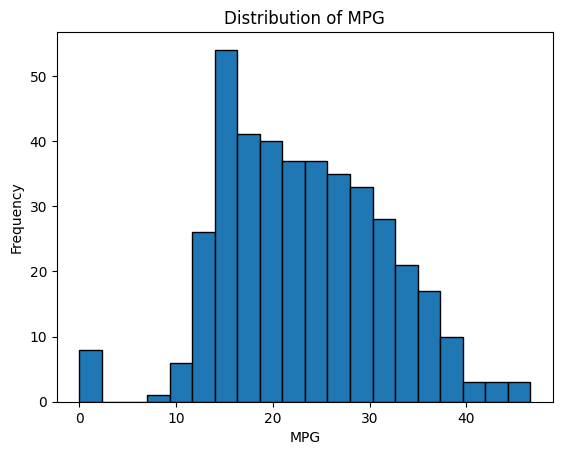

In [257]:
cars["MPG"] = pd.to_numeric(cars["MPG"], errors="coerce")

#Verify conversion
print("Data types after conversion:\n, cars.dtypes")

#plot histogram of MPG
plt.hist(cars['MPG'].dropna(), bins=20, edgecolor='black')
plt.title("Distribution of MPG")
plt.xlabel("MPG")
plt.ylabel("Frequency")
plt.show()

If we observe the graph above, we can consider it in a way or another normally distributed. Therefore, we can impute the missing values using the mean.

To compute the mean we need numeric values. However the values in the dataframe are objects. Therefore, we need to change them to numerics so that we can compute them.

Now let's see what is the mean of the MPG column

In [258]:
mean_mpg = cars["MPG"].mean() # Compute the mean of the MPG column

print(f"Mean of MPG: (excluding missing values): {mean_mpg:.2f}")

Mean of MPG: (excluding missing values): 23.10


We can use this mean to compute the missing values since the graph demonstarted a normal distribution

In [259]:
cars["MPG"].fillna(mean_mpg) #Fill in missing MPG values using the mean
#The MPG column follows a roughly normal distribution which means mean imputation can be used for this and is the appropriate step to take

print("Missing values in MPG after imputation:", cars["MPG"].isnull().sum())

Missing values in MPG after imputation: 3


### **Car Dataset - Simple Imputer**

*SimpleImputer* is a `scikit-learn` class which is helpful in handling the missing data in the predictive model dataset. It replaces the `NaN` values with a specified placeholder.
It is implemented by the use of the `SimpleImputer()` method which takes the following arguments :

`missing_values` : The missing_values placeholder which has to be imputed. By default is NaN

`strategy` : The data which will replace the NaN values from the dataset. The strategy argument can take the values – ‘mean'(default), ‘median’, ‘most_frequent’ and ‘constant’.


In [260]:
from sklearn.impute import SimpleImputer

#Initalize SimpleIMputer to replace missing MPG values
imputer = SimpleImputer(missing_values=np.nan, strategy="mean") #Prepare imputer to fill missing values

#Let's start by importing the `SimpleImputer` into our notebook

What we need to do are two essential steps:

1. fit the data (compute the mean / median / most freq)
2. transform the data (place the computed values in the NaN cells)

In [261]:
#Reshape column to 2d array since it is required by SimpleImputer
mpg_values = cars["MPG"].values.reshape(-1, 1)

#Step 1: Fit the imputer (get the mean)
imputer.fit(mpg_values)

#Step 2: Transform the data (replace NaNs with mean
cars["MPG"] = imputer.transform(mpg_values)

print("Missing values in MPG after SimpleImputer:", cars["MPG"].isnull().sum())

#Result should be 0 to show all missing values have been filled successfully

Missing values in MPG after SimpleImputer: 0


### **Outlier Detection**


An Outlier is a data-item/object that deviates significantly from the rest of the (so-called normal)objects. They can be caused by measurement or execution errors. The analysis for outlier detection is referred to as outlier mining. There are many ways to detect the outliers, and the removal process is the data frame same as removing a data item from the panda’s data frame.



https://www.geeksforgeeks.org/detect-and-remove-the-outliers-using-python/





In [262]:
#import dataset from sklearn (I was unsure what diabetes dataset since I didnt see it on the course shell so I assumed it was the one from sklearn)
from sklearn.datasets import load_diabetes

#load dataset
diabetes_data = load_diabetes()

#Convert to df for easier handleing

df_diabetes = pd.DataFrame(data=diabetes_data.data, columns=diabetes_data.feature_names)
df_diabetes["target"] = diabetes_data.target

#Display first 5 rows
print(df_diabetes.shape)
df_diabetes.head()

(442, 11)


,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0


### Outliers Visualization

#### Visualizing Outliers Using Box Plot
It captures the summary of the data effectively and efficiently with only a simple box and whiskers. Boxplot summarizes sample data using 25th, 50th, and 75th percentiles. One can just get insights(quartiles, median, and outliers) into the dataset by just looking at its boxplot.

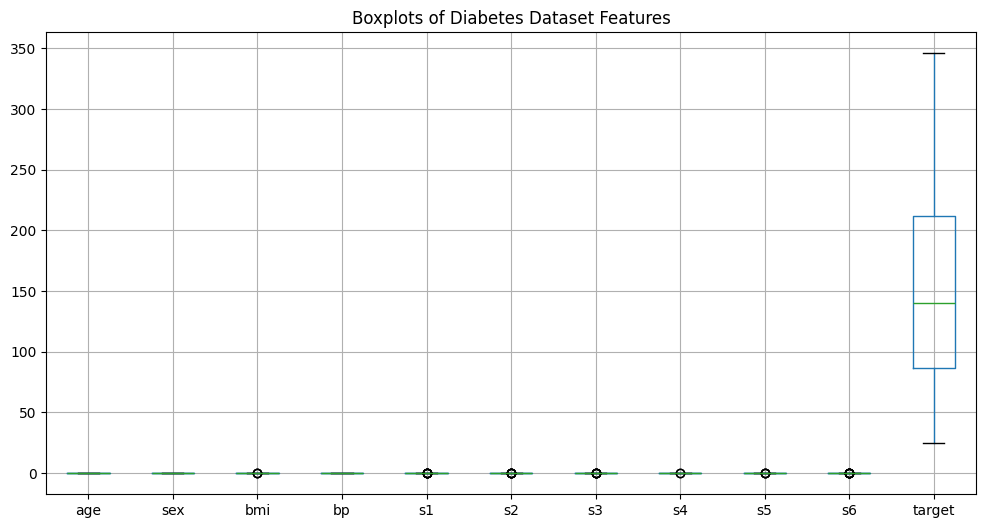

In [263]:
df_diabetes.boxplot(figsize=(12, 6))
plt.title("Boxplots of Diabetes Dataset Features")
plt.show()
#Each box shows distribution and points beyond whiskers can indicate the outliers
#

#### Visualizing Outliers Using ScatterPlot.

It is used when you have paired numerical data and when your dependent variable has multiple values for each reading independent variable, or when trying to determine the relationship between the two variables. In the process of utilizing the scatter plot, one can also use it for outlier detection.

#### Z-Score:
Z- Score is also called a standard score. This value/score helps to understand that how far is the data point from the mean. And after setting up a threshold value one can utilize z score values of data points to define the outliers.
<br>
Zscore = (data_point -mean) / std. deviation



Now to define an outlier threshold value is chosen which is generally 3.0. As 99.7% of the data points lie between +/- 3 standard deviation (using Gaussian Distribution approach).

Rows where Z value is greater than 2

#### IQR (Inter-Quartile Range)
Inter Quartile Range approach to finding the outliers is the most commonly used and most trusted approach used in the research field. <Br>
IQR = Quartile3 - Quartile1

To define the outlier base value is defined above and below dataset’s normal range namely Upper and Lower bounds, define the upper and the lower bound (1.5*IQR value is considered) :<br>
upper = Q3 + 1.5 * IQR <br>
lower = Q1 - 1.5 * IQR <br> 

- Removing the outliers:
For removing the outlier, one must follow the same process of removing an entry from the dataset using its exact position in the dataset because in all the above methods of detecting the outliers end result is the list of all those data items that satisfy the outlier definition according to the method used.